In [60]:
# Import the libraries that we will use to analyze the data

import pandas as pd
import seaborn as sns
import numpy as np
import re

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # adjusted Parameters that configures the plots

In [123]:
# Import the dataset

movies = pd.read_csv(r'/Users/matty/Downloads/Data Analyst Portfolio Project/Project 4 - Correlation in Python/movies.csv')

In [32]:
# Checking the data
movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [33]:
# Check for missing data

for i in movies.columns:
    percent_missing = np.mean(movies[i].isnull())
    print('{} - {}%'.format(i, percent_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [101]:
# Check the column data types

movies.dtypes

name            object
rating          object
genre           object
year             int64
released        object
score          float64
votes            int64
director        object
writer          object
star            object
country         object
budget           int64
gross            int64
company         object
runtime          int64
yearcorrect     object
dtype: object

In [124]:
# We should change the data types for all numerical values except for the score.
# It looks like there are some NULL values so we will fill them with 0

movies.fillna({'votes':0, 'budget':0, 'gross':0, 'runtime':0}, inplace = True)

In [125]:
# Now we can change the datatypes
movies['votes'] = movies['votes'].astype('int64')
movies['budget'] = movies['budget'].astype('int64')
movies['gross'] = movies['gross'].astype('int64')
movies['runtime'] = movies['runtime'].astype('int64')
movies['star'] = movies['star'].astype('str')
movies['company'] = movies['company'].astype('str')

In [126]:
# Some of values in year and released do not match.  
# We will create a new column using the first 4 values of the released column.

# First we will replace
movies['released'] = movies['released'].replace(regex=r'\(([^)]+)\)', value='') 
# ([^)]+) finds everything between the parentheses

In [127]:
# Now that we have the right format, we can extract the year at the end of the string
movies['yearcorrect'] = movies['released'].astype(str).str[-5:]

In [130]:
# Order the data by gross revenue
movies.sort_values(by = ['gross'], inplace = False, ascending = False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1989,"January 26, 1990",4.5,274,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92,1990
1614,Edge of Sanity,R,Horror,1989,"April 14, 1989",5.2,1300,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0,Allied Vision,85,1989
1606,"I, Madman",R,Fantasy,1989,"April 7, 1989",6.0,2900,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0,Trans World Entertainment (TWE),89,1989
1601,My Twentieth Century,NaN,Comedy,1989,"January 13, 1990",7.1,1500,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0,Budapest Stúdió Vállalat,104,1990


In [98]:
# We want to see which variables are highly correlated with each other.
# Our hypotheses is that the budget, director, star and company will have high correlation with the gross revenue.

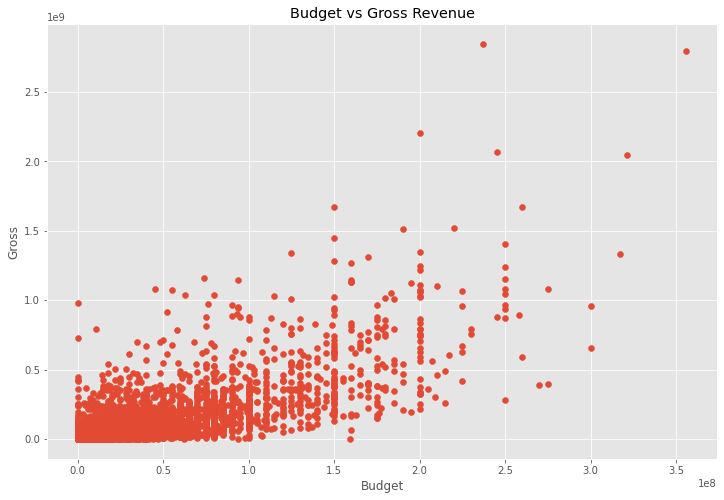

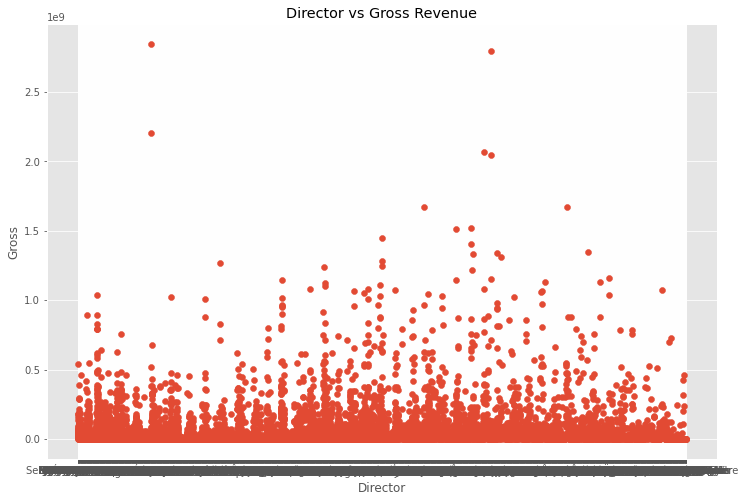

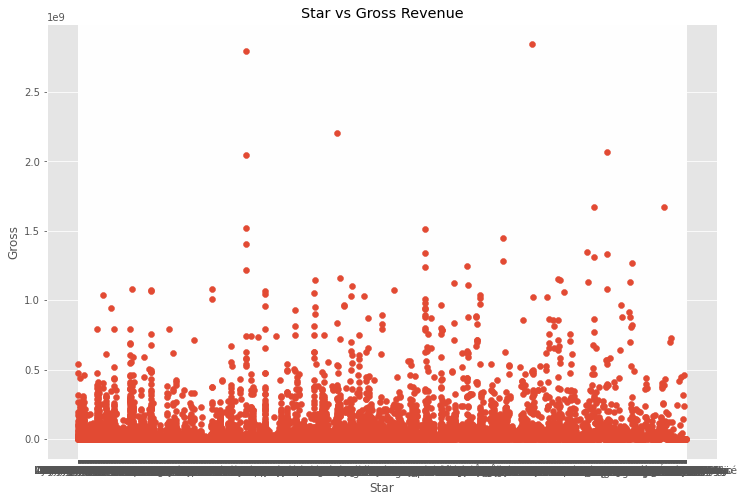

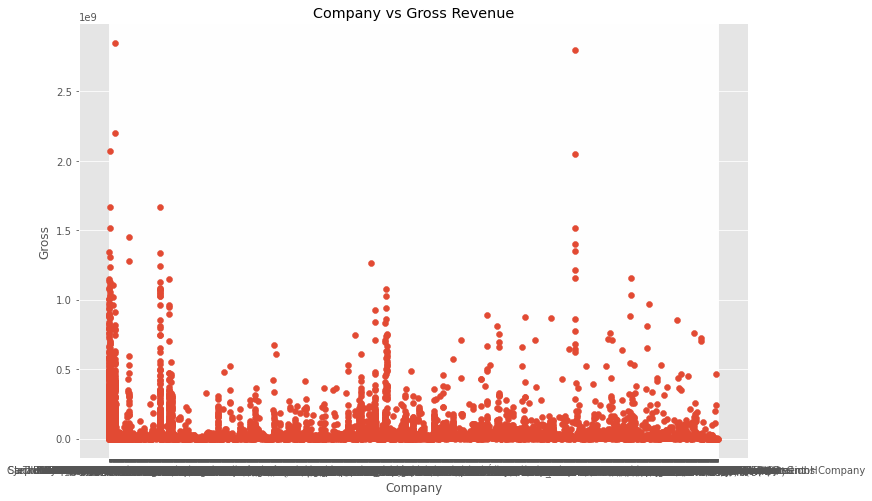

In [103]:
# We can build a scatter plot of the variables vs gross to visualize the data

plt.scatter(x = movies['budget'], y = movies['gross'])
plt.title('Budget vs Gross Revenue')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.show()

plt.scatter(x = movies['director'], y = movies['gross'])
plt.title('Director vs Gross Revenue')
plt.xlabel('Director')
plt.ylabel('Gross')
plt.show()


plt.scatter(x = movies['star'], y = movies['gross'])
plt.title('Star vs Gross Revenue')
plt.xlabel('Star')
plt.ylabel('Gross')
plt.show()

plt.scatter(x = movies['company'], y = movies['gross'])
plt.title('Company vs Gross Revenue')
plt.xlabel('Company')
plt.ylabel('Gross')
plt.show()

Based on the scatter plots, we can see that there is more of a increasing pattern compared to the last 3.  However, this isn't enought evidence to suggest correlation.

<AxesSubplot:xlabel='budget', ylabel='gross'>

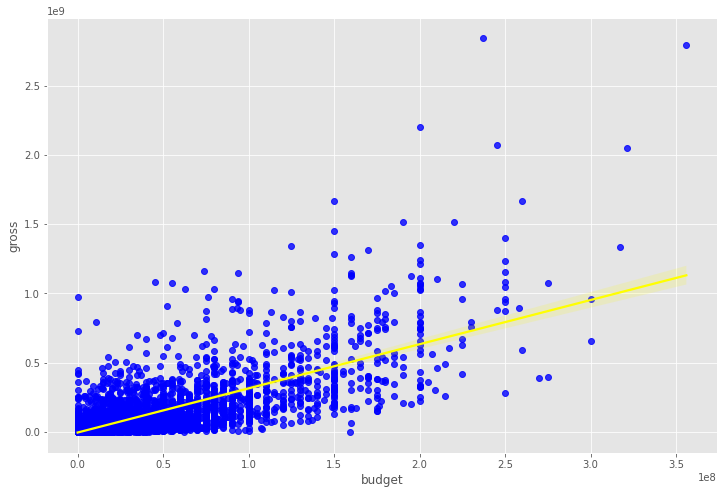

In [106]:
# Plot the budget vs gross using seaborn
sns.regplot(x='budget', y='gross', data = movies, scatter_kws = {"color":"blue"}, line_kws = {"color":"yellow"})

In [108]:
# Determine the correlation.  NOTE: It only works on numerical fields

movies.corr(method = 'pearson') 
# There are different types of correlation that you can use (i.e. pearson, kendall, spearman)

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222427,0.309212,0.261900,0.116358
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.398387
votes,0.222427,0.409182,1.000000,0.486931,0.632870,0.306984
budget,0.309212,0.055665,0.486931,1.000000,0.750157,0.268372
gross,0.261900,0.186392,0.632870,0.750157,1.000000,0.244339
runtime,0.116358,0.398387,0.306984,0.268372,0.244339,1.000000


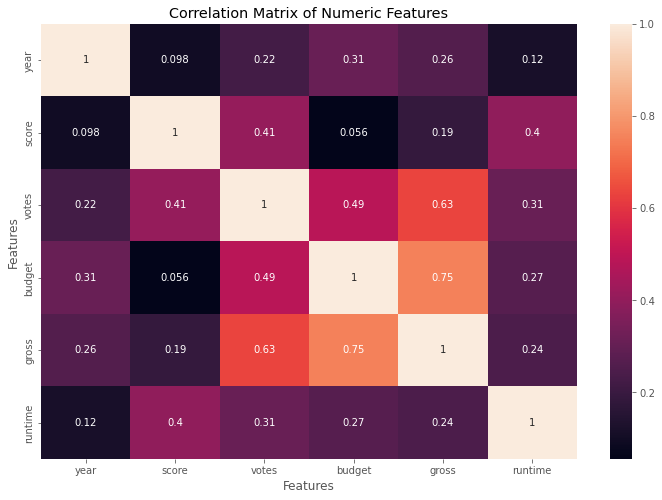

In [110]:
# Create a heat map to visualize the correlation

correlation_matrix = movies.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matrix of Numeric Features')
plt.xlabel('Features')
plt.ylabel('Features')

plt.show()

In [121]:
# We can give unique numeric identifiers for the variables that contain strings so that we can plot their correlation

movies2 = movies

for i in movies2.columns:
    if(movies2[i].dtype =='object'):
        movies2[i] = movies2[i].astype('category')
        movies2[i] = movies2[i].cat.codes # assigns a number to the each unique value

movies2 # We can see that the variables that contained strings (object type) were assigned a number

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,-1,6,2020,2964,3.1,18.0,1500,2289,2421,55,7000.0,NaN,-1,90.0
7664,1678,-1,4,2020,1107,4.7,36.0,774,2614,1886,55,NaN,NaN,539,90.0
7665,4717,-1,6,2020,193,5.7,29.0,2061,2683,2040,55,58750.0,NaN,941,NaN
7666,2843,-1,6,2020,2817,NaN,NaN,1184,1824,450,55,15000.0,NaN,-1,120.0


In [131]:
movies

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020",3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,nan,90,2020
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020",4.7,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90,2020
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020",5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,0,2020
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020",NaN,0,James Randall,James Randall,Christina Roz,United States,15000,0,nan,120,2020


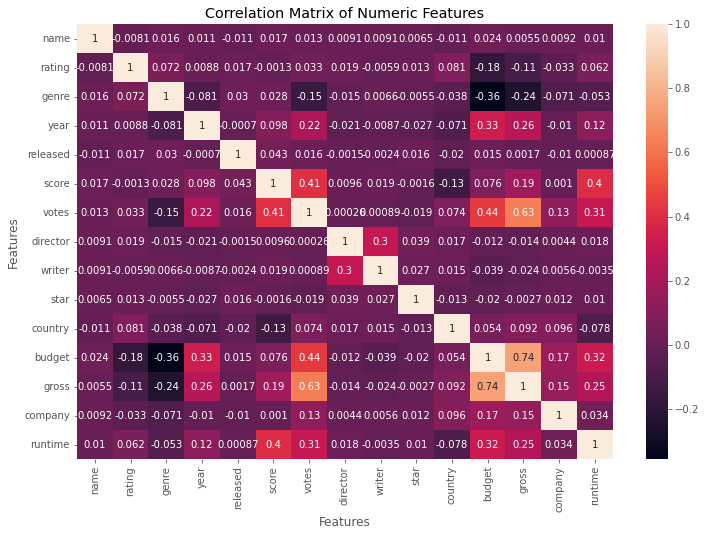

In [132]:
# We can now use seaborn to plot a heatmap of all the variables
correlation_matrix = movies2.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matrix of Numeric Features')
plt.xlabel('Features')
plt.ylabel('Features')

plt.show()

In [137]:
correlation_matrix2 = movies2.corr()

correlation_pairs = correlation_matrix2.unstack()

correlation_pairs

name     name        1.000000
         rating     -0.008069
         genre       0.016355
         year        0.011453
         released   -0.011311
                       ...   
runtime  country    -0.078412
         budget      0.320447
         gross       0.245216
         company     0.034402
         runtime     1.000000
Length: 225, dtype: float64

In [142]:
sorted_pairs = correlation_pairs.sort_values()

sorted_pairs

budget    genre      -0.356564
genre     budget     -0.356564
          gross      -0.235650
gross     genre      -0.235650
rating    budget     -0.176002
budget    rating     -0.176002
genre     votes      -0.145307
votes     genre      -0.145307
score     country    -0.133348
country   score      -0.133348
gross     rating     -0.107339
rating    gross      -0.107339
year      genre      -0.081261
genre     year       -0.081261
country   runtime    -0.078412
runtime   country    -0.078412
company   genre      -0.071067
genre     company    -0.071067
year      country    -0.070938
country   year       -0.070938
runtime   genre      -0.052711
genre     runtime    -0.052711
writer    budget     -0.039451
budget    writer     -0.039451
genre     country    -0.037615
country   genre      -0.037615
company   rating     -0.032943
rating    company    -0.032943
star      year       -0.027242
year      star       -0.027242
writer    gross      -0.023519
gross     writer     -0.023519
year    

In [141]:
pd.set_option('display.max_rows', 500) # To display the entire output